<a href="https://colab.research.google.com/github/krucx/ML_from_scratch/blob/main/Kernel_Perceptron_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def create_dataset(n=150,globs=3,mean=[[-2,-2],[2,-2],[0,2]]):
  x = []
  y = []
  per_glob = n//globs
  for i in range(globs):
    for j in range(per_glob):
      yp = (i%2==0)*2 - 1
      x.append([np.random.rand(1)*2-1+mean[i][0],np.random.rand(1)*2-1+mean[i][1]])
      y.append(yp)
  return x,y

In [ ]:
def plot_Data(X,Y):
  x1 = []
  x2 = []
  color = []
  for i in range(X.shape[0]):
    if Y[i] == 1:
      color.append('r')
    else:
      color.append('b')
    x1.append(X[i][0])
    x2.append(X[i][1])
  plt.scatter(x1,x2,c=color)

(180, 2)


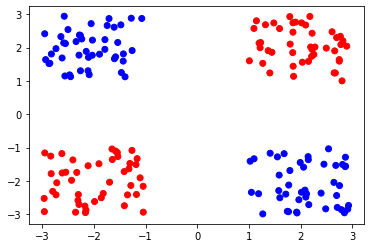

In [ ]:
x,y = create_dataset(180,4,mean=[[-2,-2],[2,-2],[2,2],[-2,2]]) # create_dataset(180,4,mean=[[-2,-2],[2,-2],[2,2],[-2,2]]) for 4 classes
X = np.squeeze(np.array(x),axis=2)
print(X.shape)
Y = np.array(y)
X = X.astype('float')  # to avoid np.std() error 'numpy.ndarray' object has no attribute 'sqrt'
plot_Data(X,Y)

In [ ]:
def normalize(X,cols=[0,1]):
  means = np.mean(X,axis=0)
  std = np.std(X,axis=0)
  for i in cols:
    X[:,i] = (X[:,i] - means[i])/std[i]
  return X

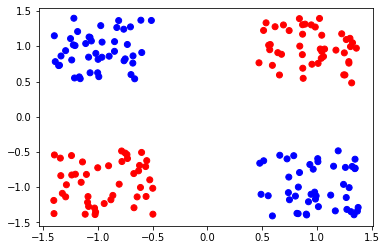

In [ ]:
X = normalize(X,[0,1])
plot_Data(X,Y)

In [ ]:
print(X.shape)
print(Y.shape)

(180, 2)
(180,)


In [ ]:
def shuffle(X,Y):
  m = X.shape[1]
  y = Y.reshape((Y.shape[0],1))
  combined = np.append(X,y,axis=1)
  np.random.shuffle(combined)
  return combined[:,:m],combined[:,m:].reshape(Y.shape[0])

In [ ]:
def kernelF(X,Z,p=2):
  return (1+np.dot(X,Z.T))**p

In [ ]:
def sideOfHyperPlane(X,Y,Z,alpha,b,p=2):
  return np.sum(np.multiply(np.multiply(alpha,Y),kernelF(X,Z,p)))

In [ ]:
def perceptron(X,Y,p=2,epochs=10):
  alpha = np.zeros(Y.shape)
  b=0
  for j in range(epochs):
    for i in range(X.shape[0]):
      if Y[i]*(sideOfHyperPlane(X,Y,X[i],alpha,b,p) + b)<= 0:
        alpha[i] = alpha[i] + 1
        b = b + Y[i]
  return alpha,b

In [ ]:
epochs = 10
p=2
X,Y=shuffle(X,Y)
alpha,b = perceptron(X,Y,p,epochs)
print(alpha)
print(b)

[1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0


In [ ]:
def accuracy(X,Y,alpha,b,p=2):
  acc=0
  for i in range(X.shape[0]):
    if Y[i]*(sideOfHyperPlane(X,Y,X[i],alpha,b,p)+b) >= 0:
      acc=acc+1
  acc = acc/X.shape[0]
  return acc

In [ ]:
accuracy(X,Y,alpha,b,p)

1.0

In [ ]:
def plot_Decision_Boundary(X,Y,alpha,b,p=2,r=1.5,nspace=100):
  x_plot = np.linspace(-r,r,nspace)
  x1 = []
  x2 = []
  color = []
  for i in x_plot:
    for j in x_plot:
      x1.append(i)
      x2.append(j)
      x = np.array([i,j])
      if (sideOfHyperPlane(X,Y,x,alpha,b,p)+b) >= 0:
        color.append('g')
      else:
        color.append('y')
  plt.scatter(x1,x2,c=color)

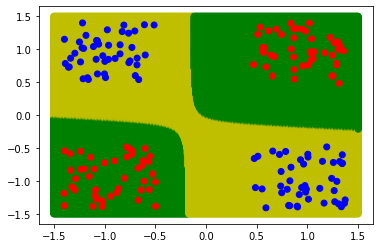

In [ ]:
plot_Decision_Boundary(X,Y,alpha,b,p=2,r=1.5,nspace=400)
plot_Data(X,Y)